# SIXT33N Phase 3: Controls
## EE16B: Designing Information Devices and Systems II, Spring 2020
-----

## Table of Contents

* ### [Note](https://drive.google.com/a/berkeley.edu/file/d/1uRgTTOW3KFSbWGJS9DvJRNQZ6SkcMHij/view?usp=sharing)
* [Part 1: Jolt Calculation](#part1)
* [Part 2.1: Closed Loop Design](#part21)
* [Part 2.2: Closed Loop Simulation and k-Value Selection](#part22)
* [Part 2.3: Closed Loop Implementation](#part23)
* [Part 2.4: k-Value Tuning](#part24)
* [Part 3.1: Steady-State Error Correction](#part31)
* [Part 3.2: Implementing Steady-State Error Correction](#part32)


<a id='part1'></a>

## <span style="color:navy">Part 1: Jolt Calculation</span>
-----

### <a href="https://drive.google.com/open?id=1uRgTTOW3KFSbWGJS9DvJRNQZ6SkcMHij">Before you proceed, read Parts 1-3 of the note.</a>

We find the jolts below by calculating the inputs that result in the minimum of the maximum velocities of both wheels. 

- **Make sure your `data_coarse.txt` (or `data_coarse_gsi.txt` if you are doing software only) from System ID is in the same directory as the iPython notebook.**
- Run the code below to find your initial jolt values.
- Your initial jolt values are correct if they are the input values that correspond to the points where the blue and yellow lines intersect the green line respectively.

int left_jolt = 130;
int right_jolt = 30;


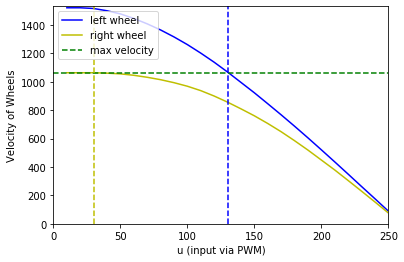

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import utils
%matplotlib inline

left_jolt, right_jolt = utils.find_jolt()
print('int left_jolt = {};\nint right_jolt = {};'.format(left_jolt, right_jolt))

<a id='part21'></a>
## <span style="color:navy">Part 2: Closed-Loop Design</span>
-----

Now that we have an open loop model, we can build a closed loop controller that uses feedback to ensure that both wheels drive at the same velocity. The controller has 2 inputs, namely the desired velocity and the difference between the wheel distances $\delta[k] = d_L[k] - d_R[k]$.

### 1. Please make sure you have read the <a href="https://drive.google.com/file/d/1aOfVURyRcfJG4s2wVjpLsnJn8tfcKcM4/view?usp=sharing">the closed-loop section of the note </a> before you begin. You may also find it helpful to read <a href="https://inst.eecs.berkeley.edu/~ee16b/fa17/proj/controls-primer.pdf">this PDF</a> for the derivation of the closed-loop system and its eigenvalue.

<span style="color:#ba190f">**2. Now derive the closed loop update equation for the differences $\delta[k]$ corresponding to your controller.**</span> Keep this somewhere, as you will use it in your report.

Now that we've derived the model, we can begin implementing it. Fill in the two functions below.

In [2]:
# YOUR PARAMETERS HERE
theta_left = 0.1623
theta_right = 0.187
beta_left = -38.72
beta_right = -35.58
v_star = 67.4

simulator = utils.Simulator(theta_left, theta_right, beta_left, beta_right)

In [3]:
# DESIGN YOUR CLOSED-LOOP CONTROL HERE
def drive_straight_left_cl(v_star, delta, k):
    """Returns the closed loop input 'u' for the left wheel, k is the control gain for the left wheel"""
    
    return (v_star+beta_left)/theta_left - k*delta/theta_left

def drive_straight_right_cl(v_star, delta, k):
    """Returns the closed loop input 'u' for the right wheel, k is the control gain for the right wheel"""
    
    return (v_star+beta_right)/theta_right + k*delta/theta_right

<a id='part22'></a>
## 2.2 Closed Loop Simulation and K-Value Selection

Next we need to choose values for the control gains so that the $\delta[k]$ update equation is stable. There should be a range of parameter values that make it stable, so we can tune the gains to get the desired performance.

For each set of values you choose, the plot on the left shows the car's performance given a model that exactly matches the physical car. In this case, $\delta$ converges to 0. The plot on the right shows that under model mismatch, $\delta$ actually converges to a nonzero value, $\delta_{ss}$. **Remember the car is still traveling straight in this scenario.** At this value, the turning effect of the terms $-k_L\delta_{ss}/\theta_R$ and $k_R\delta_{ss}/\theta_R$ in the closed-loop equations cancel out the turning effect of the model error.

<span style="color:#ba190f">**Choose k-values that will cause the car to fit each of the descriptions below. Be ready to explain why you chose the values you did.**</span>

$\delta(k+1) = (1-2k)\delta(k)$

$\delta(k+1) = 0.8\delta(k)$ stable

$\delta(k+1) = 1\delta(k)$ marginally stable

Steady state error = -3.16
Steady state error = unbounded
kL=0, kR=0
Eigenvalue of system: 1-kL-kR=1; marginally stable


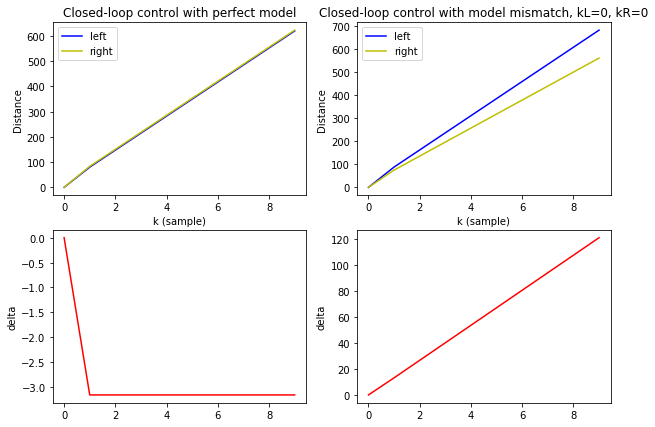

Steady state error = 0.00
Steady state error = 13.48
kL=0.5, kR=0.5
Eigenvalue of system: 1-kL-kR=0; stable, corrects error in one step


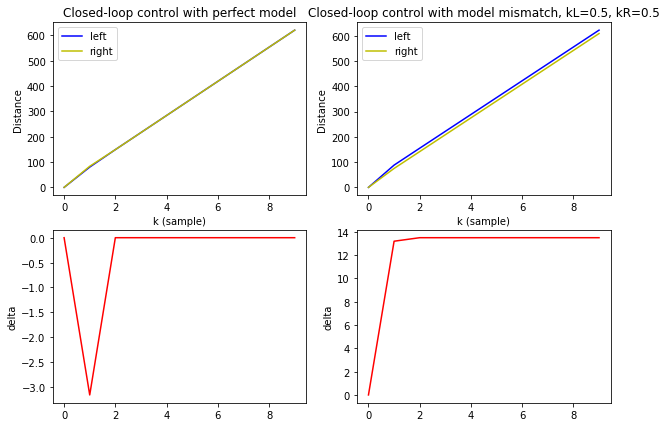

Steady state error = oscillatory
Steady state error = oscillatory
kL=1, kR=1
Eigenvalue of system: 1-kL-kR=-1; oscillatory, marginally stable


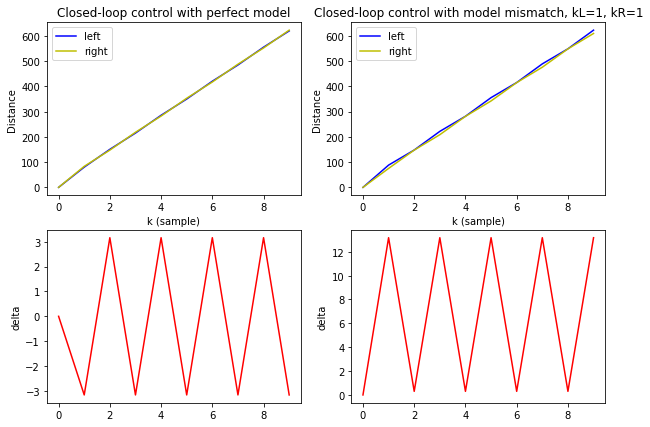

Steady state error = oscillatory
Steady state error = unbounded
kL=2, kR=2
Eigenvalue of system: 1-kL-kR=-3; oscillatory, unstable


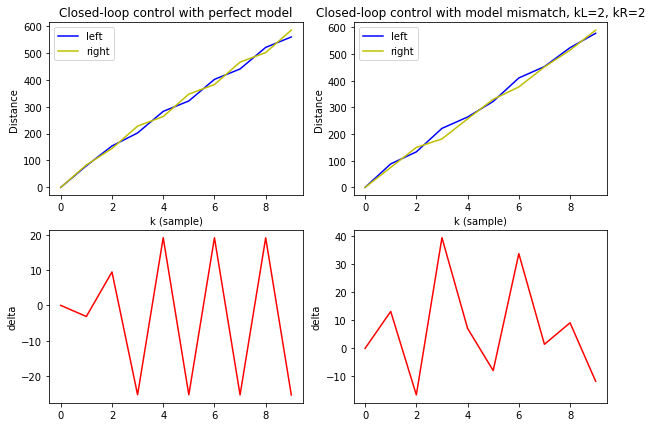

Steady state error = 0.00
Steady state error = 16.85
kL=0.4, kR=0.4
Eigenvalue of system: 1-kL-kR=0.2; stable


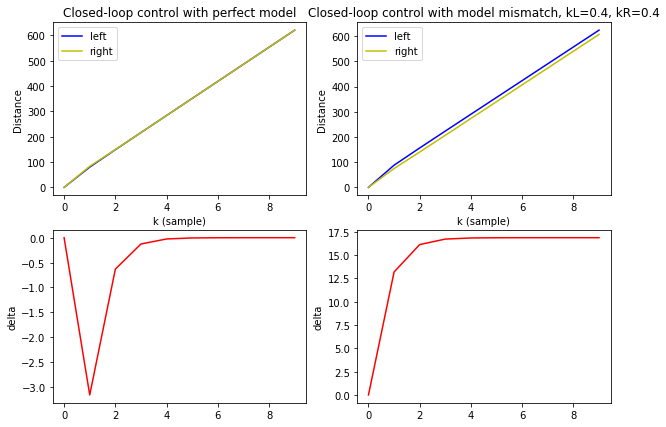

In [4]:
steady_state_error = None

# Maps description of k_values to (k_left, k_right)
# Fill in the dictionary below with appropriate values.
k_values = {
    "marginally stable": (0,0),
    "stable, corrects error in one step": (0.5,0.5),
    "oscillatory, marginally stable": (1, 1), #lambda = -1 = 1 - kl - kr
    "oscillatory, unstable": (2, 2),
    "stable": (0.4, 0.4),
}

for key in k_values:
    k_left, k_right = k_values[key]

    titles = ["Closed-loop control with perfect model",
              "Closed-loop control with model mismatch, kL={}, kR={}".format(k_left, k_right)]
    _, delta = utils.two_sims(titles, simulator, v_star, drive_straight_left_cl, drive_straight_right_cl, k_left, k_right)

    print("kL={}, kR={}".format(k_left, k_right))
    print("Eigenvalue of system: 1-kL-kR={:.2g}; {}".format(1-k_left-k_right, key))
    plt.show()
    steady_state_error = delta[-1]

<a id='part23'></a>
## 2.3 Closed Loop Implementation

Now implement the controller on the Launchpad. The sketch **`closed_loop.ino`** contains some code that implements the closed loop control. 

- Copy `CODE BLOCK CON1` from **`open_loop.ino`** and add your control gains **`k_left`** and **`k_right`**.
- Fill out `CODE BLOCK CON2` with your closed-loop control scheme.
- Fill out `CODE BLOCK CON0` in the body of the loop function to calculate the control inputs. Inspect this code to see how the control system is implemented. For now, ignore the term `delta_ss`, as it's currently set to 0.
- Upload the sketch to your LaunchPad.
    - Make sure that the car is suspended above the desk. Your car wheels are going to move in this step.
    - Check that the wheels are moving as you expect them to.
    - If you use your hand to put some friction on the wheels, does the feedback correct for it?

Once you are satisfied that your motors work and your closed-loop control is implemented, run the car on the ground. If it behaves erroneously (for example the controller oscillates), try different eigenvalues. Our simulations compare our possibly mismatched linear model with a linear approximation of our car. In reality, the car is a nonlinear system.

**Note:** It's possible that the car curves *slightly* over long distances, even if it the car thinks it's traveling straight. We can fix this after we make the car turn.

<span style="color:#ba190f">**1. What are some reasons why the simulation might behave differently from the car? What about the differences between when the car is on the ground versus when it is on the desk?**</span> The simulation uses sample data from the GSI-provided files. We don't have data from our car. The simulation doesn't have errors. There are terms that aren't accurately modelled.

<span style="color:#ba190f">**2. What would happen if we set the k-values to 0?**</span> The car should have a constant $\delta$, meaning it continues in the direction it started because there is a constant distance offset between the wheels.

<a id='part24'></a>
## 2.4 K-Value Tuning

How did the car behave? It probably didn't go perfectly straight with the first set of k values that you picked. In order to find the "right" k values, we will need to analyze the behavior of our car. Recall in lecture that we learned about how the control values will affect the convergence of a system.

*(In the plot below, ignore the k-values. Those are for a different (PID) controller.)*
![](https://upload.wikimedia.org/wikipedia/commons/c/c0/Change_with_Ki.png)

The above plot can be summarized as:
- if k is too small, it takes a long time to converge to our desired solution
- if k is too big, oscillations happen

We can use this information to help guide us to k values that get our car going straight. Check out this youtube playlist if you need some examples of what each case could look like: https://www.youtube.com/playlist?list=PLQ1OVCqw6RUPgCmv8H6y9qbcMBT8lotDt

You will likely have to try several sets of k values until you find one that works well with your particular car. If you find yourself having a lot of trouble narrowing in on some, ask your GSI for help!

<a id='part31'></a>

## <span style="color:navy">Part 3: Steady-State Error Correction</span>
-----
Lastly, what if we want the car to travel in (approximately) the same direction as when it starts moving? We can manually add the known steady state error $\delta_{ss}$ to each calculation of the error $\delta$. Accounting for the known $\delta_{ss}$ helps the model better respond to unexpected pertubations affecting $\delta$ which increases the model's control strength.

We now calculate $\delta[k]=d_L - d_R + \delta_{ss}$.


Steady state error = 0.00
Steady state error = 13.48
Steady state error = 0.00


Text(0, 0.5, 'delta')

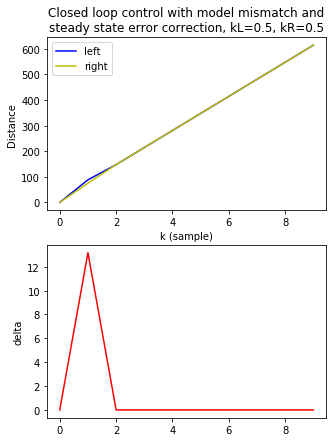

In [5]:
k_left, k_right = (0.5, 0.5) # put your values here
_, delta = utils.two_sims(titles, simulator, v_star, drive_straight_left_cl, drive_straight_right_cl, k_left, k_right)
steady_state_error = delta[-1]
plt.close()
plt.figure(figsize=(5, 7))
plt.subplot(211)
# Simulate using steady_state_error
steady_state_error = simulator.simulate(v_star, drive_straight_left_cl, drive_straight_right_cl, k_left, k_right)[-1]
d = simulator.simulate(
    v_star, drive_straight_left_cl, drive_straight_right_cl, k_left, k_right, mismatch_error=0.1,
    offset=steady_state_error[0] - steady_state_error[1]
)
delta = simulator.plot(d)
plt.title("Closed loop control with model mismatch and\nsteady state error correction, kL={}, kR={}"
          .format(k_left, k_right))
plt.subplot(212)
plt.plot(delta, 'r')
plt.ylabel('delta')

- `closed_loop.ino` collects data as it runs, including $\delta[k]$.
    - Let the car run until it settles to (approximately) straight.
    - Switch off the motors and plug the MSP into your computer.
    - Close the serial monitor (if it's open), and reopen the serial monitor.
- Note the steady-state value $\delta_{ss}$.
    - The first column of the printed data is $\delta$ over time.
    - **If $\delta$ doesn't reach steady-state, the car is not going straight according to the sensors.**
        - It's okay if it isn't exactly constant. Just be sure the variation is small in proportion to the average value.

<a id='part32'></a>

## 3.2 Implementing Steady State Error Correction


- Input your value of $\delta_{ss}$ in `CODE BLOCK CON3` in **`closed_loop.ino`**.
- Convince yourself that we need to *add* this value in `CODE BLOCK CON0`.

For example, if the car drives straight but turned right from its initial heading, we want the right wheel to farther so it turns back towards the left. Adding a positive number to delta accomplishes this.

<span style="color:#ba190f">**Look at the notes. For each case in the figures on page 4 (demonstraing different behaviors for k values), plot the trajecctory of the car before and after the control loop starts. Show 4 trajecctories to your GSI before check-off. (kl=kr=0.1, kl=kr=0.5, kl=k4=0.9, kl=kr=1)**</span>


## <span style="color:#ba190f">CHECKOFF</span>
-----
**Show your GSI that your car moves in a straight line.** Your GSI will also check your k values and ask some additional questions.